In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # pattern searching
import seaborn as sns # statistical plots
import matplotlib.pyplot as plt # plots
from scipy import stats
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [61]:
df = pd.read_csv("C:/Users/aleja/Desktop/Analisis de datos08-10-2022/clase8/data/ames_housing/ames.csv")

df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


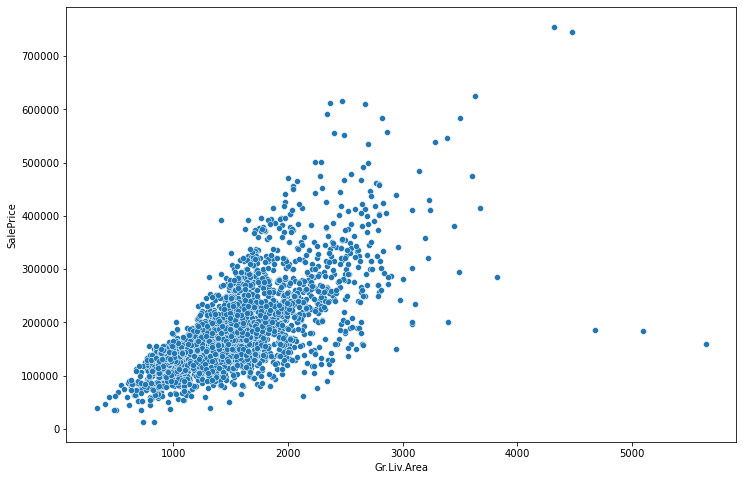

In [62]:
df_1 = df.drop(df[(df['Gr.Liv.Area']>4000)&(df['SalePrice']<700000)].index)
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df, x='Gr.Liv.Area', y='SalePrice', ax=ax);

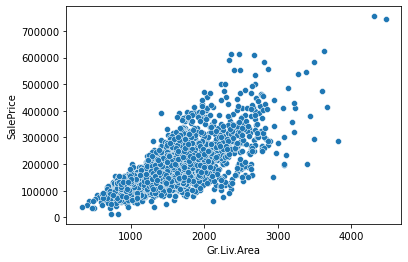

In [63]:
# se eliminan los valores atipicos
df = df.drop(df[(df['Gr.Liv.Area']>4000)&(df['SalePrice']<700000)].index)
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=df, x='Gr.Liv.Area', y='SalePrice', ax=ax);

In [64]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS.SubClass      2927 non-null   int64  
 3   MS.Zoning        2927 non-null   object 
 4   Lot.Frontage     2437 non-null   float64
 5   Lot.Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot.Shape        2927 non-null   object 
 9   Land.Contour     2927 non-null   object 
 10  Utilities        2927 non-null   object 
 11  Lot.Config       2927 non-null   object 
 12  Land.Slope       2927 non-null   object 
 13  Neighborhood     2927 non-null   object 
 14  Condition.1      2927 non-null   object 
 15  Condition.2      2927 non-null   object 
 16  Bldg.Type        2927 non-null   object 
 17  House.Style   

(2927, 82)

In [66]:
##converting the numerical columns into object columns
df['Garage.Yr.Blt'] = df['Garage.Yr.Blt'].fillna(0).astype('int64')
df['MS.SubClass'] = df['MS.SubClass'].astype('object')
df['Mo.Sold'] = df['Mo.Sold'].astype('object', copy=False)
df['Yr.Sold'] = df['Yr.Sold'].astype('object', copy=False)

In [67]:
##MSZoning: Mode MSZoning values sharing same MSSubclass and Neighborhood 
df['MS.Zoning']=df.groupby(['MS.SubClass', 'Neighborhood'])['MS.Zoning'].transform(lambda x:x.fillna(x.mode()[0]))

##Lot Features
df['Lot.Frontage']=df.groupby("MS.Zoning")['Lot.Frontage'].transform(lambda x:x.fillna(x.median()))

##Masonry Veneer Features
df['Mas.Vnr.Area'].where(df['Mas.Vnr.Area'].notna(), 0, inplace=True)
df['Mas.Vnr.Type'].where(df['Mas.Vnr.Type'].notna(), "None", inplace=True)


##Basement Feautres
df['Bsmt.Qual'].where(df['Total.Bsmt.SF']!=0, "NA", inplace=True)
df['Bsmt.Cond'].where(df['Total.Bsmt.SF']!=0, "NA", inplace=True)
df['Bsmt.Exposure'].where(df['Total.Bsmt.SF']!=0, "NA", inplace=True)
df['BsmtFin.Type.1'].where(df['Total.Bsmt.SF']!=0, "NA", inplace=True)
df['BsmtFin.Type.2'].where(df['Total.Bsmt.SF']!=0, "NA", inplace=True)
df['Bsmt.Full.Bath'].where(df['Total.Bsmt.SF']!=0, 0.0, inplace=True)
df['Bsmt.Half.Bath'].where(df['Total.Bsmt.SF']!=0, 0.0, inplace=True)
df['BsmtFin.SF.1'].where(df['Total.Bsmt.SF']!=0, 0.0, inplace=True)
df['BsmtFin.SF.2'].where(df['Total.Bsmt.SF']!=0, 0.0, inplace=True)
df['Bsmt.Unf.SF'].where(df['Total.Bsmt.SF']!=0, 0.0, inplace=True)

##Garage Features
df['Garage.Cond'].where(df['Garage.Area']!=0, "NA", inplace=True)
df['Garage.Qual'].where(df['Garage.Area']!=0, "NA", inplace=True)
df['Garage.Finish'].where(df['Garage.Area']!=0, "NA", inplace=True)
df['Garage.Type'].where(df['Garage.Area']!=0, "NA", inplace=True)


##Utilities: 2916 out of 2917 realized utilities values are 'AllPub'. We will just use the mode to fill NA values
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])


##Exterior.1st and Exterior2nd: Mode Exterior.1st and Exterior.2nd values sharing same MSSubclass and Neighborhood 
df['Exterior.1st']=df.groupby(['MS.SubClass', 'Neighborhood'])['Exterior.1st'].transform(lambda x:x.fillna(x.mode()[0]))
df['Exterior.2nd']=df.groupby(['MS.SubClass', 'Neighborhood'])['Exterior.2nd'].transform(lambda x:x.fillna(x.mode()[0]))


##Electrical
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])


##KitchenQual
df['Kitchen.Qual']=df['Kitchen.Qual'].fillna(df['Kitchen.Qual'].mode()[0])

##Functional
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])


##Fireplace Features
df['Fireplace.Qu'].where(df['Fireplaces']!=0, "NA", inplace=True)


##Pool Features
df['Pool.QC'].where(df['Pool.Area']!=0, "NA", inplace=True)
df['Pool.QC']=df['Pool.QC'].fillna(df['Pool.QC'][df['Pool.Area']!=0].mode()[0])


##Miscellaneous Features
df['Misc.Feature'].where(df['Misc.Val']!=0, "NA", inplace=True)
df['Misc.Feature']=df['Misc.Feature'].fillna('Othr')


##SaleType
df['Sale.Type']=df['Sale.Type'].fillna(df['Sale.Type'].mode()[0])


##Too many missing values in Alley and Fence feature and no logical step to impute. We will drop them. 
##Using errors='ignore' will suppress errors if non-existing rows are dropped
df.drop(axis=1, columns=['Alley', 'Fence'], errors='ignore', inplace=True)


##Missing values after primary imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS.SubClass      2927 non-null   object 
 3   MS.Zoning        2927 non-null   object 
 4   Lot.Frontage     2927 non-null   float64
 5   Lot.Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Lot.Shape        2927 non-null   object 
 8   Land.Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot.Config       2927 non-null   object 
 11  Land.Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition.1      2927 non-null   object 
 14  Condition.2      2927 non-null   object 
 15  Bldg.Type        2927 non-null   object 
 16  House.Style      2927 non-null   object 
 17  Overall.Qual  

In [68]:
#There are records where either all of the basement features are missing or the basement area is non zero but corresponding 
#categorical features are missing in that case. In former case we just assume that house does not have any basement and impute
#numerical values as '0' and categorical values as 'NA' and in latter case we just impute absolute mode value for all the 
#missing features.
##Id 2121 has no data for all the basement features. We will assume that it does not has any basement
df.iloc[2120,[28,29,30,31,33]] = 'NA'
df.iloc[2120,[32,34,35,36,45,46]] = 0.0

df.loc[2121, ['BsmtFin.Type.1',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath']]=0.0

##BsmtQual: Mode BsmtQual values for NaN
df['Bsmt.Qual']=df['Bsmt.Qual'].transform(lambda x: x.fillna(x.mode()[0]))

##BsmtCond: Mode BsmtCond values for NaN
df['Bsmt.Cond']=df['Bsmt.Cond'].transform(lambda x: x.fillna(x.mode()[0]))

##BsmtExposure: Mode BsmtExposure values for NaN
df['Bsmt.Exposure']=df['Bsmt.Exposure'].transform(lambda x: x.fillna(x.mode()[0]))

##BsmtFinTyoe2: Mode BsmtFinType2 values (that have non zero BsmtFinSF2 which is less than 500) for NaN values
df['BsmtFin.Type.2']=df['BsmtFin.Type.2'].transform(lambda x: x.fillna('Rec'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS.SubClass      2927 non-null   object 
 3   MS.Zoning        2927 non-null   object 
 4   Lot.Frontage     2927 non-null   float64
 5   Lot.Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Lot.Shape        2927 non-null   object 
 8   Land.Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot.Config       2927 non-null   object 
 11  Land.Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition.1      2927 non-null   object 
 14  Condition.2      2927 non-null   object 
 15  Bldg.Type        2927 non-null   object 
 16  House.Style      2927 non-null   object 
 17  Overall.Qual  

In [69]:
##GarageFinish
df['Garage.Finish']=df['Garage.Finish'].fillna(df['Garage.Finish'][df['Garage.Type']=='Detchd'].mode()[0])

##GarageQual
df['Garage.Qual']=df['Garage.Qual'].fillna(df['Garage.Qual'][df['Garage.Type']=='Detchd'].mode()[0])

##GarageCond
df['Garage.Cond']=df['Garage.Cond'].fillna(df['Garage.Cond'][df['Garage.Type']=='Detchd'].mode()[0])

##GarageCars
df['Garage.Cars']=df['Garage.Cars'].fillna(df['Garage.Cars'][df['Garage.Type']=='Detchd'].mode()[0])

##GarageArea
df['Garage.Area']=df['Garage.Area'].fillna(df['Garage.Area'][(df['Garage.Type']=='Detchd')&(df['Garage.Cars']==2.0)].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS.SubClass      2927 non-null   object 
 3   MS.Zoning        2927 non-null   object 
 4   Lot.Frontage     2927 non-null   float64
 5   Lot.Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Lot.Shape        2927 non-null   object 
 8   Land.Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot.Config       2927 non-null   object 
 11  Land.Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition.1      2927 non-null   object 
 14  Condition.2      2927 non-null   object 
 15  Bldg.Type        2927 non-null   object 
 16  House.Style      2927 non-null   object 
 17  Overall.Qual  

In [71]:
#3. Encoding the ordinal features into numerical features
#To process the ordinal features in the models we need to convert them into numerical features first. We will assume one step
#integer increment for each ordinal category.

df = df.replace({
    "Bsmt.Cond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Bsmt.Exposure" : {"NA" : 0,"No":1, "Mn" : 2, "Av": 3, "Gd" : 4},
    "Bsmt.FinType1" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "Bsmt.FinType2" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "Bsmt.Qual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "Exter.Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "Exter.Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "Fireplace.Qu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
    "Garage.Finish" : {"NA" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
    "Garage.Cond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Garage.Qual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Heating.QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Kitchen.Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Paved.Drive" : {"NA" : 0, "P" : 1, "Y" : 2},
    "Pool.QC" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
    "Central.Air":{"N":0,"Y":1}})

In [72]:
df_num_ord = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include=['object']).astype(str)

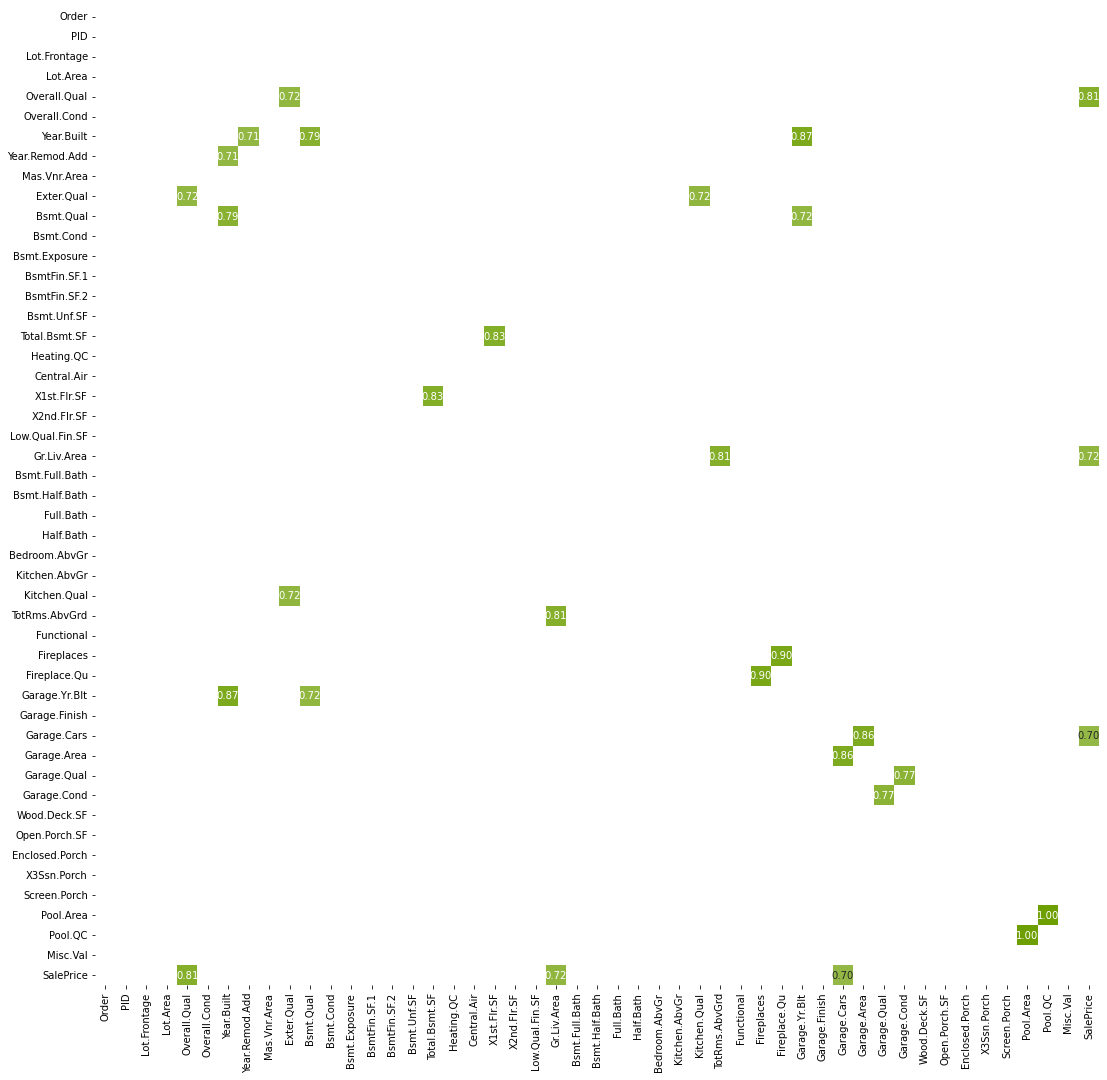

In [73]:
corr = df_num_ord.corr(method='spearman')
kot = corr[((corr>=.7) | (corr<=-0.7)) & (corr!=1.0)]
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(kot,ax=ax,center=0,annot=True,fmt='0.2f',cbar=False,cmap=sns.diverging_palette(110,110,s=100,l=60,center='light',as_cmap=True));
fig.savefig('num_corr.jpeg', dpi=1200, bbox_inches='tight')

In [101]:
def correlation(dataset, threshold):
    col_corr = set()
#     row_corr = set()
    # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
#                 rowname = corr_matrix.columns[j]
                col_corr.add(colname)
#                 row_corr.add(rowname)
    return col_corr

In [103]:
high_corr_features = correlation(df_num_ord, 0.7)
df_num_ord.drop(high_corr_features, axis=1, inplace=True, errors='ignore')
df.drop(high_corr_features, axis=1, inplace=True, errors='ignore')

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180800.77 and sigma = 79913.00



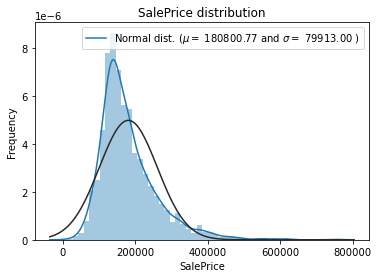

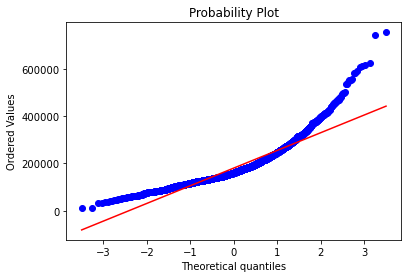

In [104]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

<AxesSubplot:xlabel='Yr.Sold', ylabel='SalePrice'>

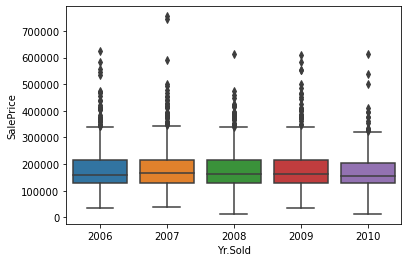

In [106]:
sns.boxplot(x=df['Yr.Sold'], y=df['SalePrice'])

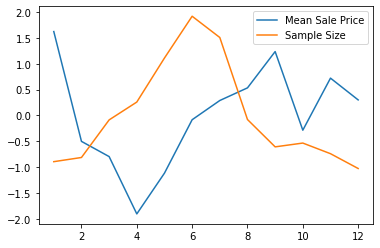

In [108]:
mean_sale_price = df.groupby('Mo.Sold').mean()['SalePrice'].rename({'SalePrice': 'Mean Sale Price'})
n_by_month = df.groupby('Mo.Sold').count()['SalePrice'].rename({'SalePrice': 'N'})


f, ax = plt.subplots()
ax.plot(mean_sale_price.index, (mean_sale_price - mean_sale_price.mean())/mean_sale_price.std(), label="Mean Sale Price")
ax.plot(mean_sale_price.index, (n_by_month - n_by_month.mean())/n_by_month.std(), label="Sample Size");
ax.legend();

In [109]:
from scipy.stats import pearsonr
print("Correlation:\t{}\nP-value:\t{}".format(*pearsonr(mean_sale_price, n_by_month)))

Correlation:	-0.3562520148462712
P-value:	0.2556969997559342


C:\Users\aleja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aleja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aleja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aleja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aleja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.9% of the points

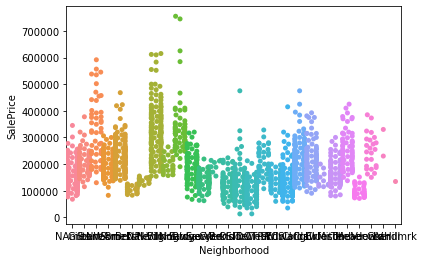

In [110]:
# sns.boxplot(x=df['Neighborhood'], y=df['SalePrice']);
# sns.stripplot(x=df['Neighborhood'], y=df['SalePrice']);
sns.swarmplot(x=df['Neighborhood'], y=df['SalePrice']);

C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


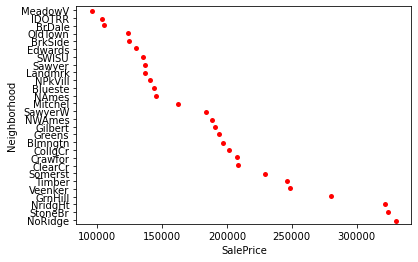

In [112]:
data = pd.concat(
    [
        df.groupby('Neighborhood').mean()['SalePrice'],
        df.groupby('Neighborhood').count()['PID']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red');
# sns.stripplot(data.sort_values(by='Id').Id, data.sort_values(by='Id').index, orient='h', color='red')